PHASE 1 DU PROJET

In [27]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

# Chargement des données à partir du fichier CSV
file_path = 'C:/Users/ngnat/OneDrive/Bureau/STAGE/2024-07-12_filteredData_DRC_Opendata_IPIS.csv'  
data = pd.read_csv(file_path)

# 1. Compréhension de la portée et des objectifs du projet
# Affichage des premières lignes du fichier pour comprendre sa structure
print("Aperçu des premières lignes du fichier :")
print(data.head())

# Affichage des informations sur les colonnes et types de données
print("\nInformations sur les données :")
print(data.info())

# 2. Familiarisation avec les pratiques et risques de l'ASM
# Statistiques descriptives sur les colonnes numériques
print("\nStatistiques descriptives des données :")
print(data.describe())

# 3. Identification et collecte des ensembles de données initiaux
# Vérification des valeurs manquantes
print("\nVérification des valeurs manquantes :")
print(data.isnull().sum())
# Imputation les valeurs manquantes avec la moyenne/médiane

# 1. Séparation des colonnes numériques et non numériques
colonnes_numeriques = data.select_dtypes(include=[np.number]).columns
colonnes_non_numeriques = data.select_dtypes(exclude=[np.number]).columns

# 2. Imputation des colonnes numériques (moyenne)
imputer_numeric = SimpleImputer(strategy='mean')
data[colonnes_numeriques] = imputer_numeric.fit_transform(data[colonnes_numeriques])

# 3. Imputation des colonnes non numériques (valeur la plus fréquente)
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
data[colonnes_non_numeriques] = imputer_non_numeric.fit_transform(data[colonnes_non_numeriques])

# 4. Vérifier qu'il n'y a plus de valeurs manquantes
print(data.isnull().sum())





Aperçu des premières lignes du fichier :
   Unnamed: 0         pcode                                name  visit_date  \
0           1  codmine00001                           Mayi-Tatu  2013-03-27   
1           2  codmine00002                             Mabanga  2013-03-27   
2           3  codmine00003                             Molende  2013-03-27   
3           4  codmine00004                          Embouchure  2013-03-27   
4           5  codmine00005  Apumu-Atandele-Jerusalem-Luka Yayo  2013-03-27   

  province  workers_numb access_dry access_wet mineral1 mineral2  ...  \
0    Ituri         150.0    No data    No data       Or      NaN  ...   
1    Ituri         115.0    No data    No data       Or      NaN  ...   
2    Ituri         130.0    No data    No data       Or      NaN  ...   
3    Ituri         135.0    No data    No data       Or      NaN  ...   
4    Ituri         270.0    No data    No data       Or      NaN  ...   

  frequency_armed_group3 state_service1 state

PHASE 2 DU PROJET


Vérification des valeurs manquantes après la collecte de nouvelles données :
Unnamed: 0                0
pcode                     0
name                      0
visit_date                0
province                  0
workers_numb              0
access_dry                0
access_wet                0
mineral1                  0
mineral2                  0
mineral3                  0
mercury                   0
interference              0
armed_group1              0
frequency_armed_group1    0
armed_group2              0
frequency_armed_group2    0
armed_group3              0
frequency_armed_group3    0
state_service1            0
state_service2            0
state_service3            0
state_service4            0
traceability              0
qualification             0
childunder15              0
childunder15work          0
project                   0
dtype: int64

Données après l'imputation des valeurs manquantes :
Unnamed: 0                0
pcode                     0
name            

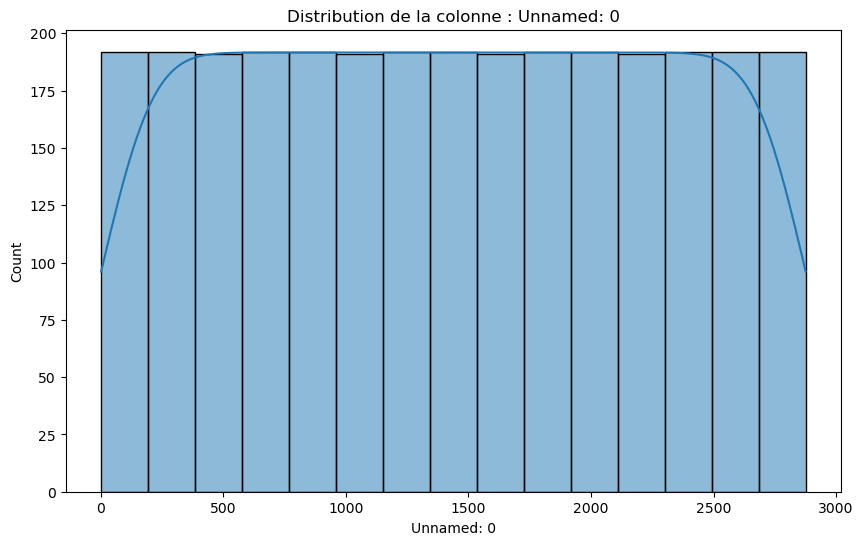

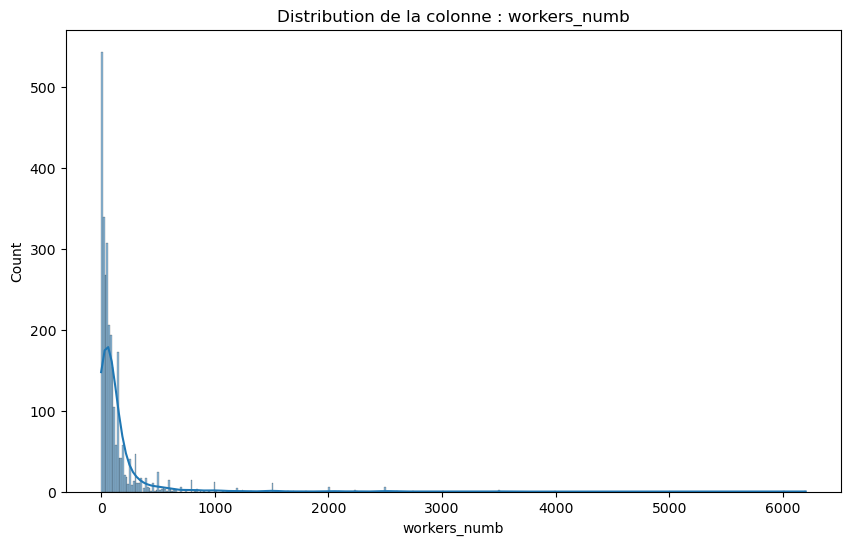

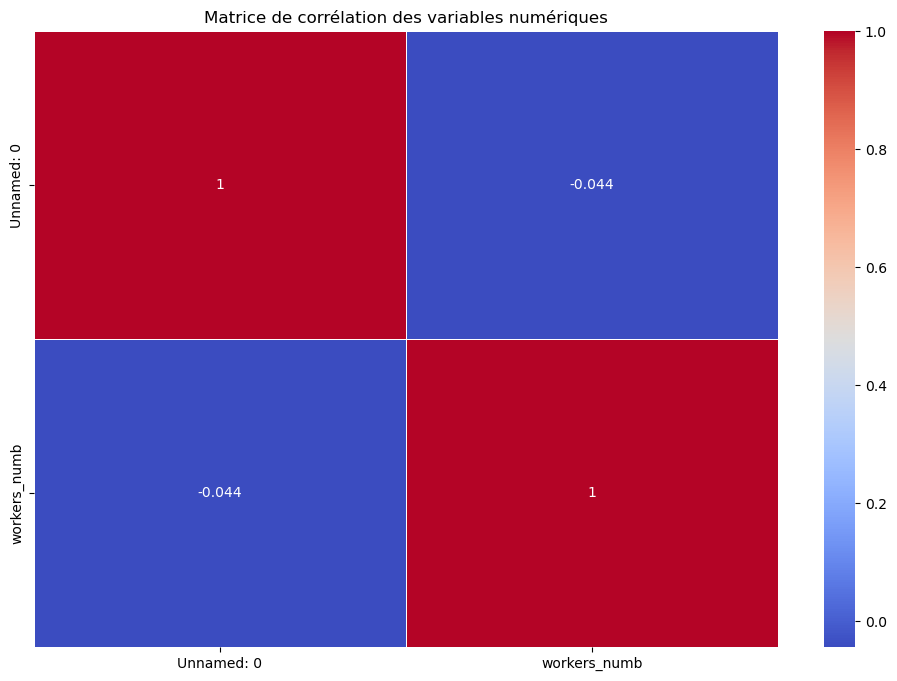

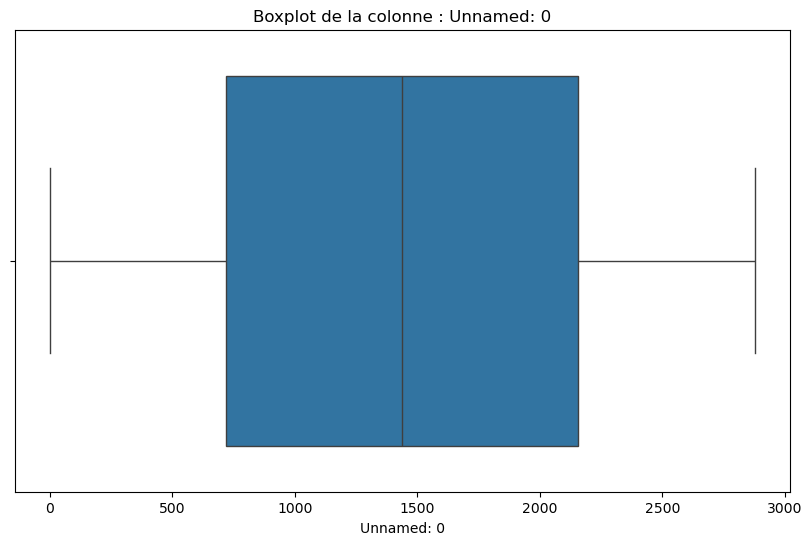

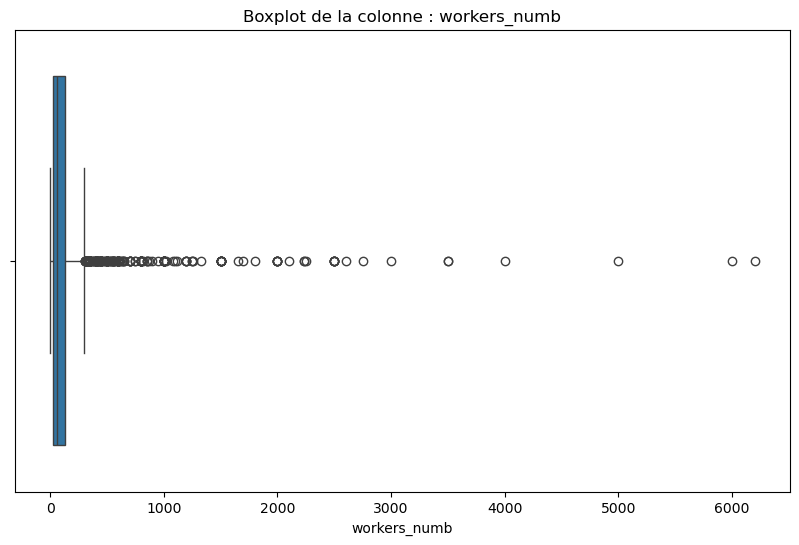


Données nettoyées sauvegardées dans le fichier 'data_cleaned_phase2.csv'.
Résumé des statistiques descriptives sauvegardé dans 'summary_stats_phase2.txt'.


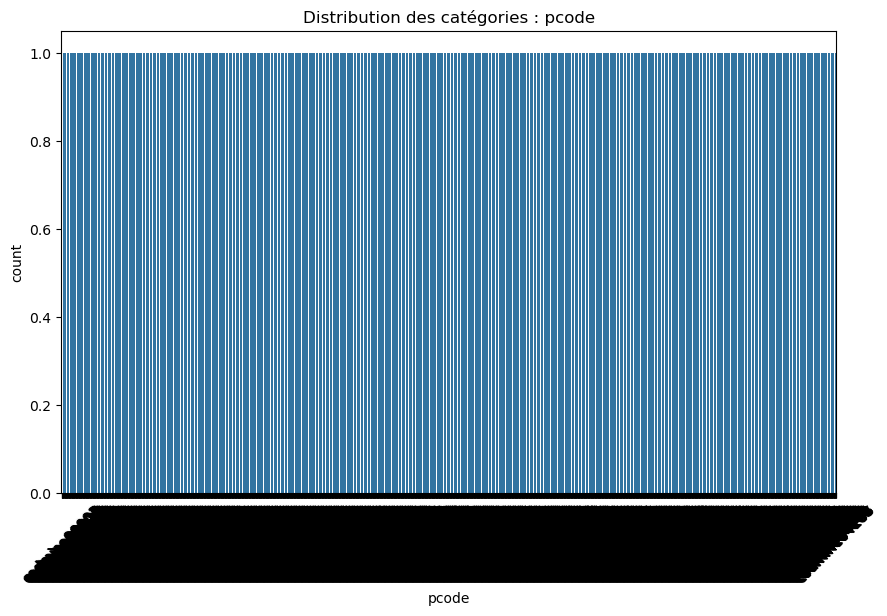

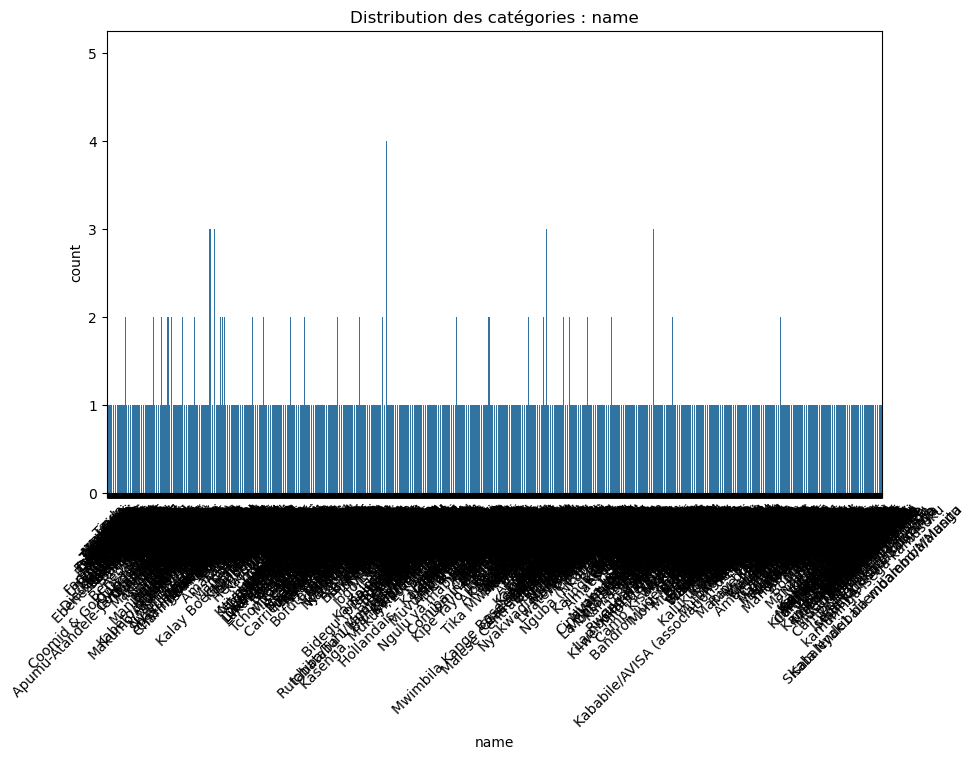

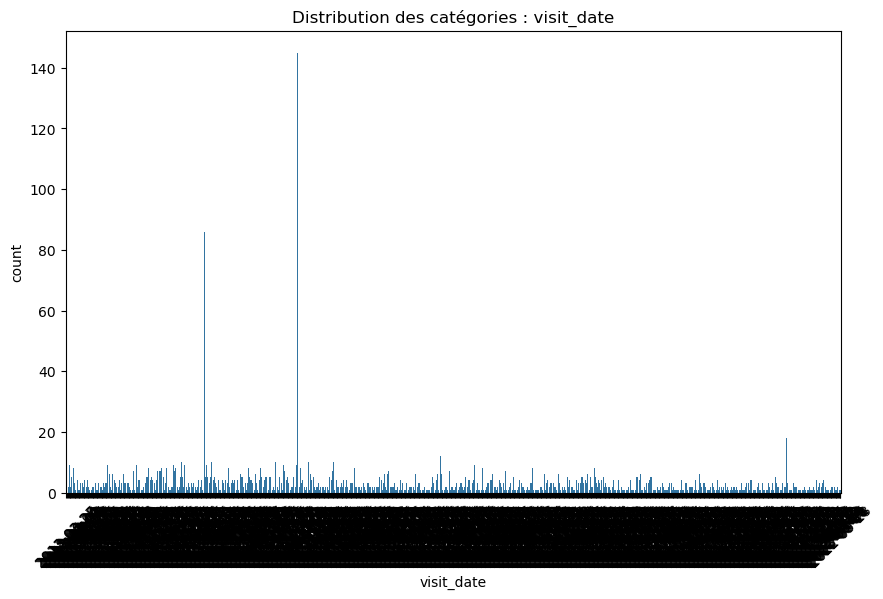

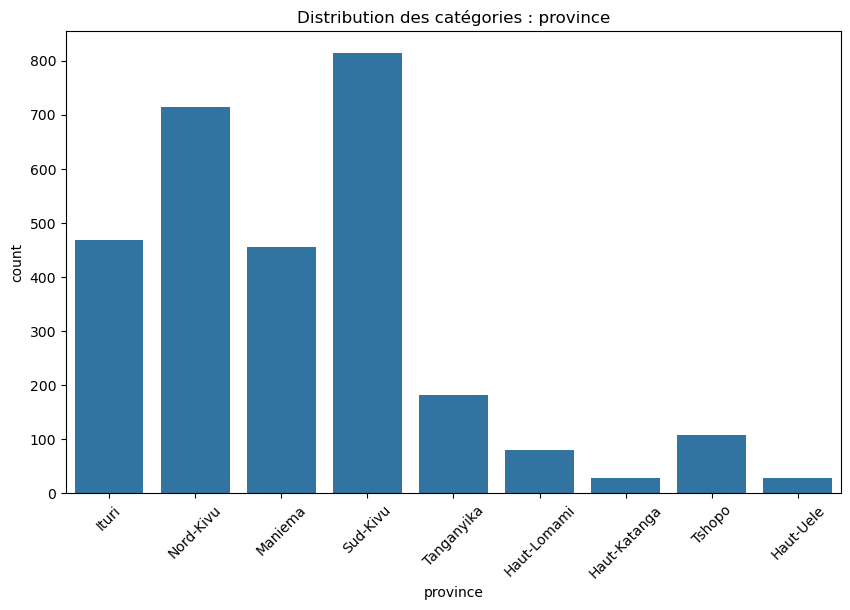

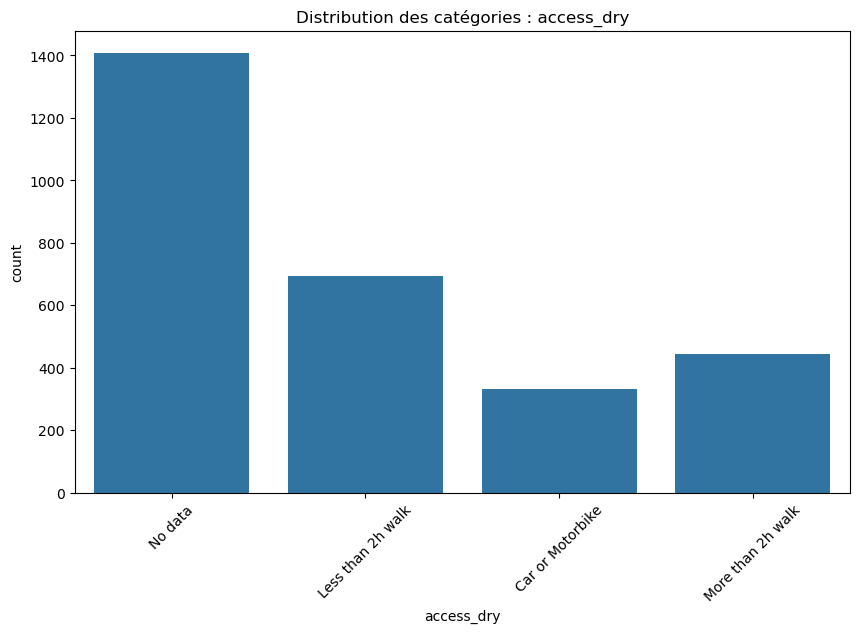

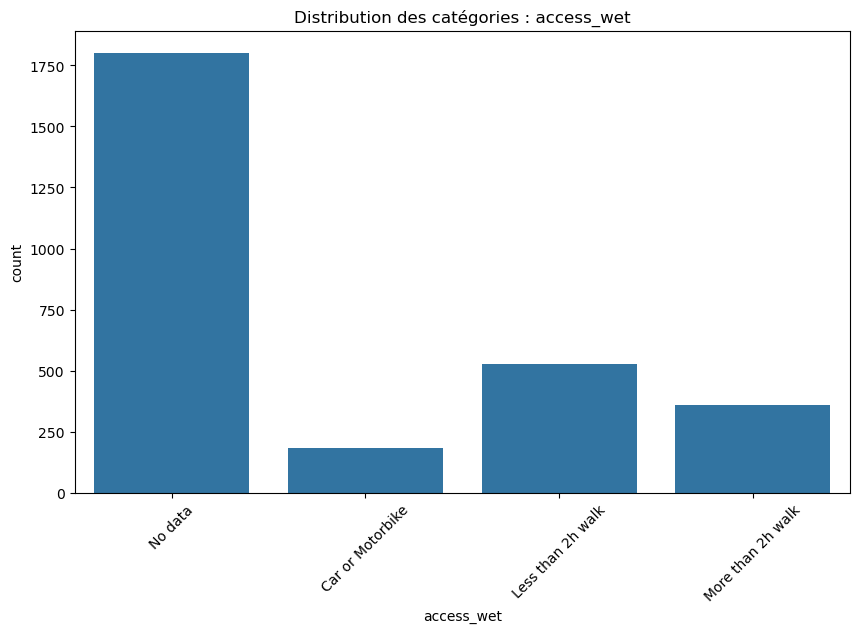

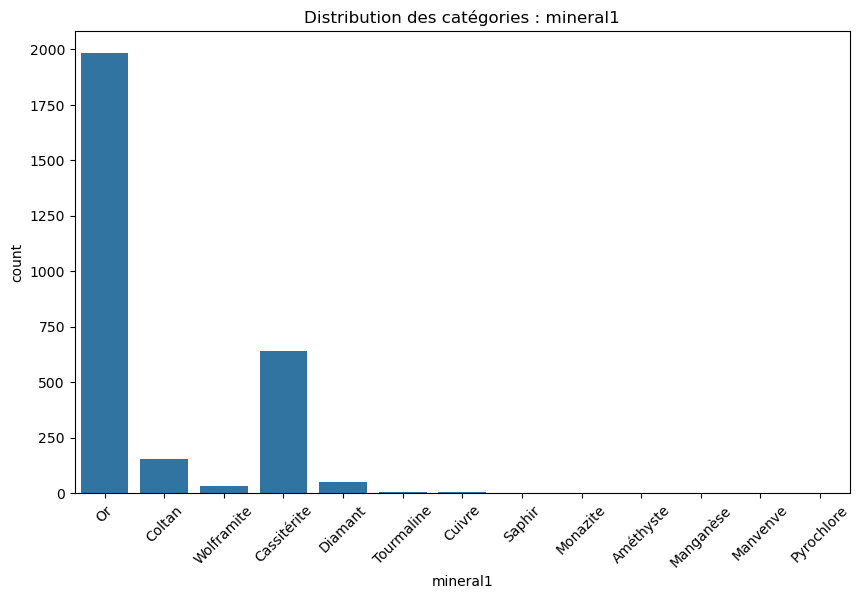

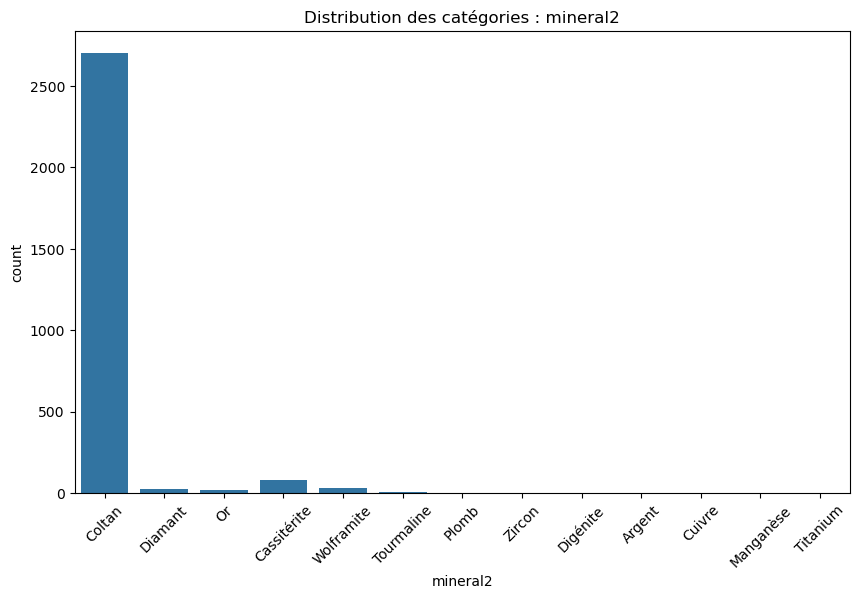

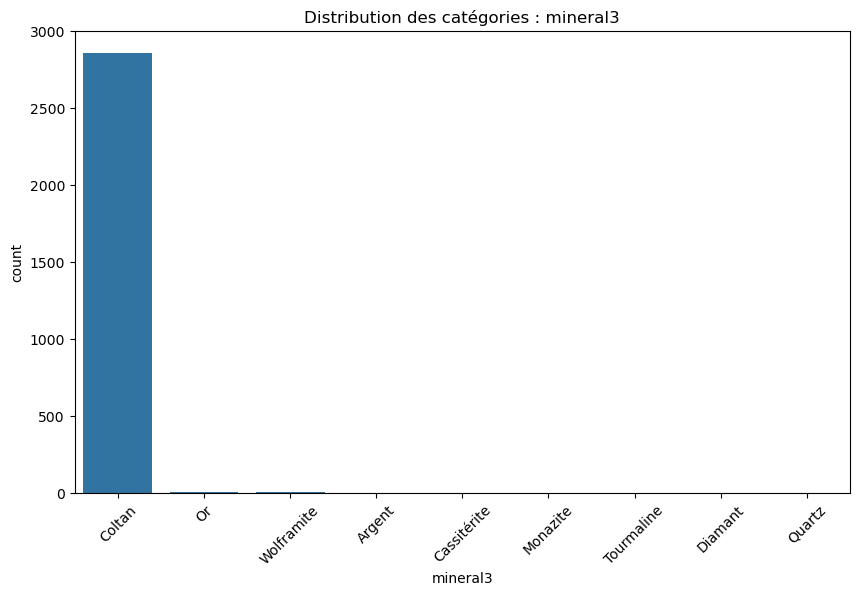

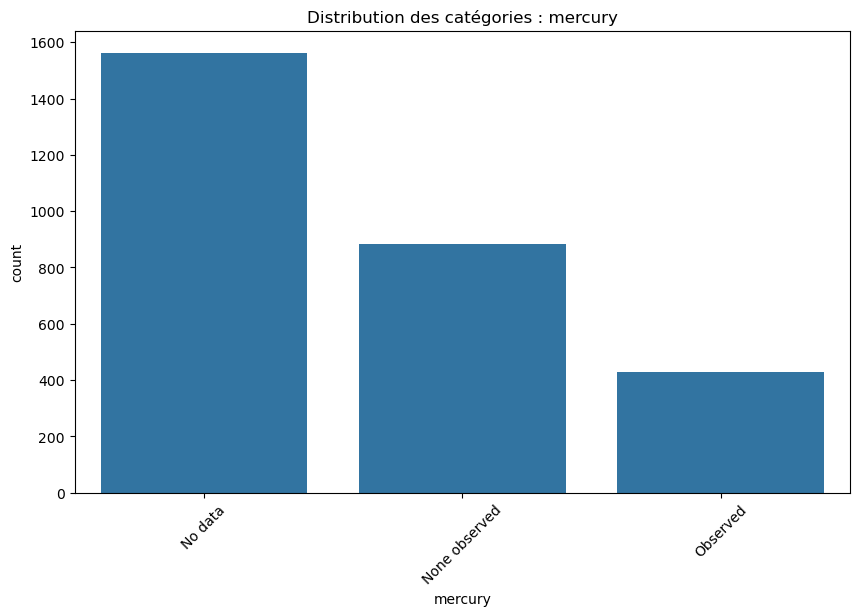

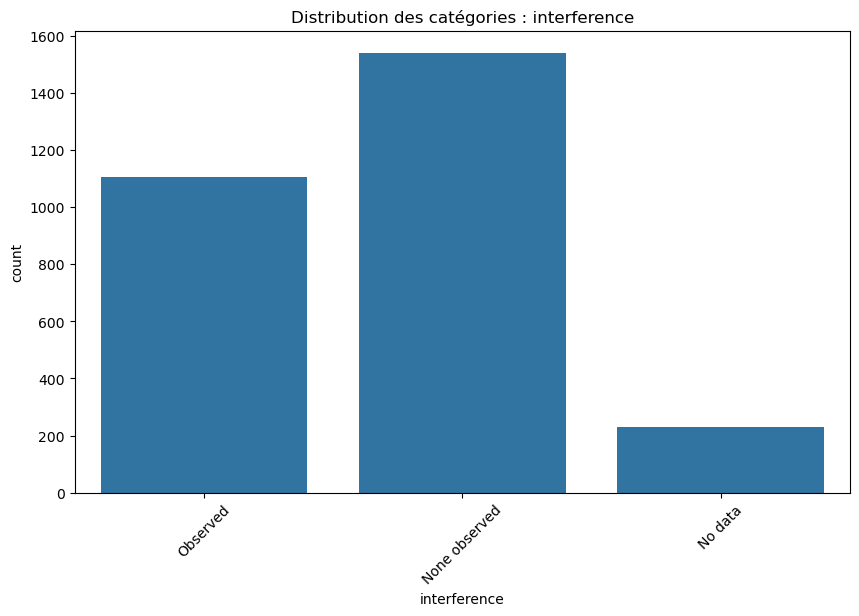

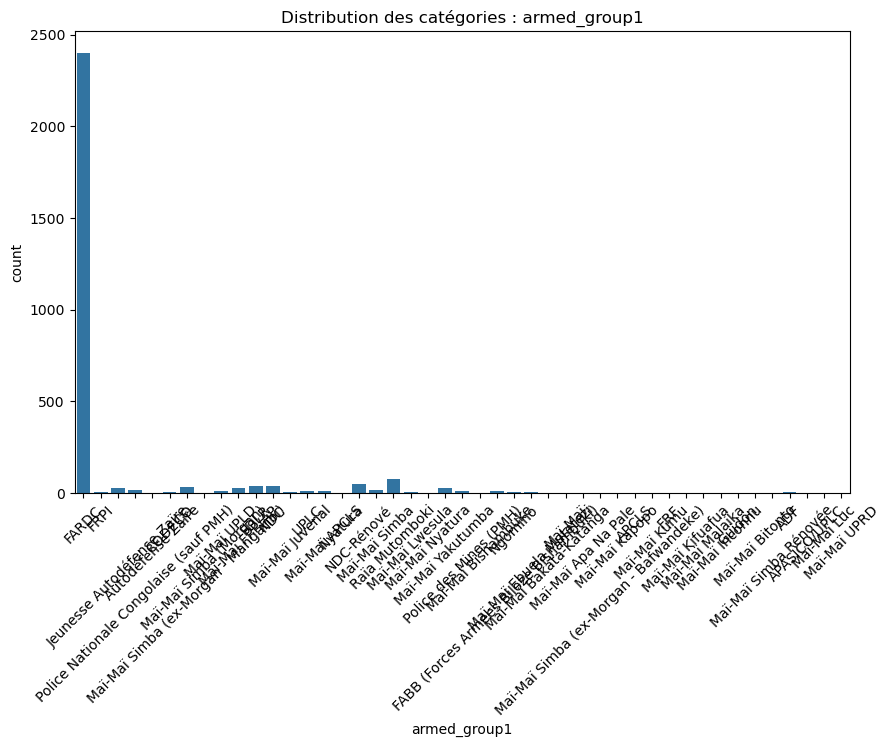

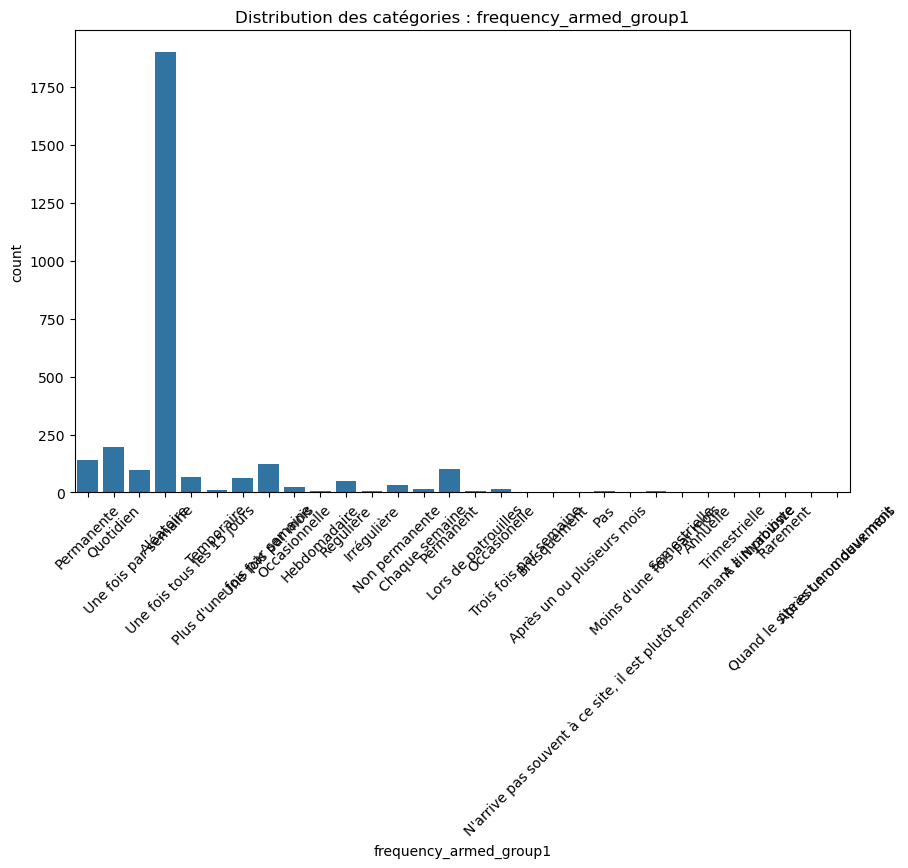

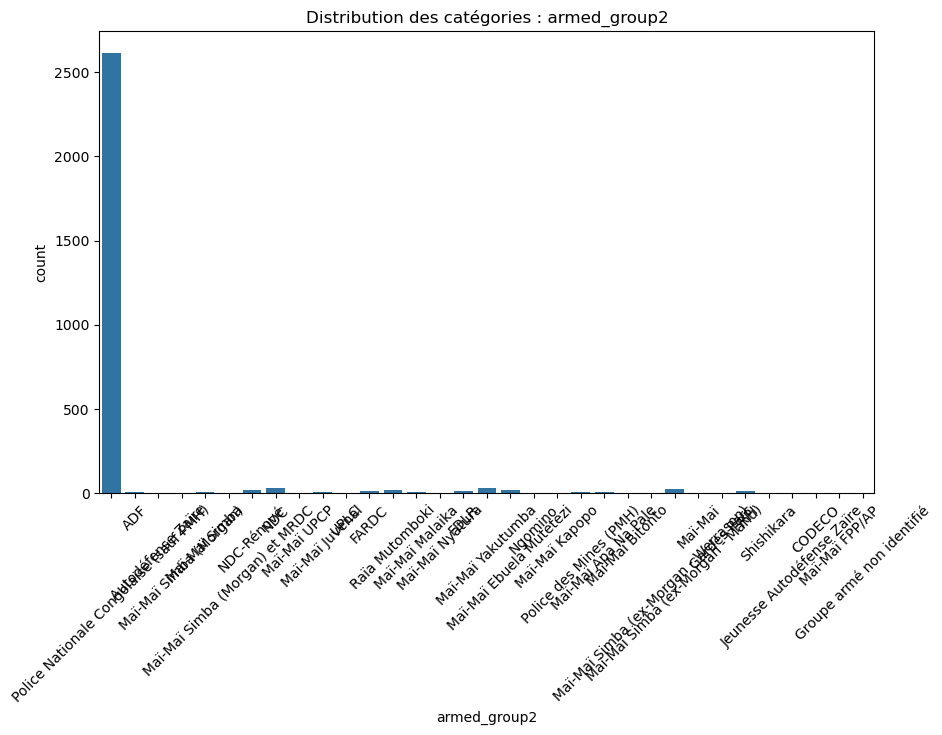

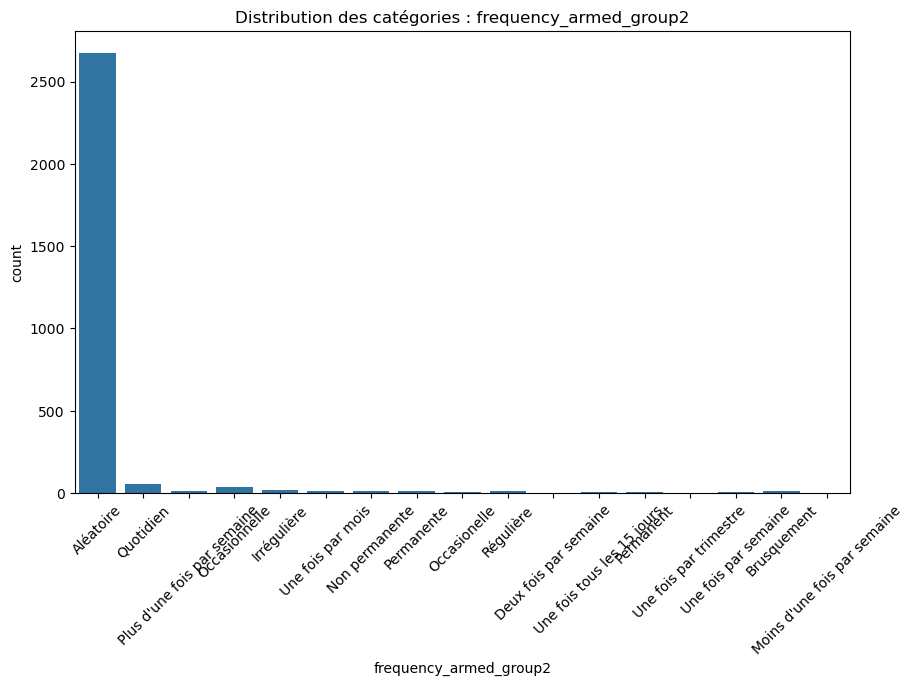

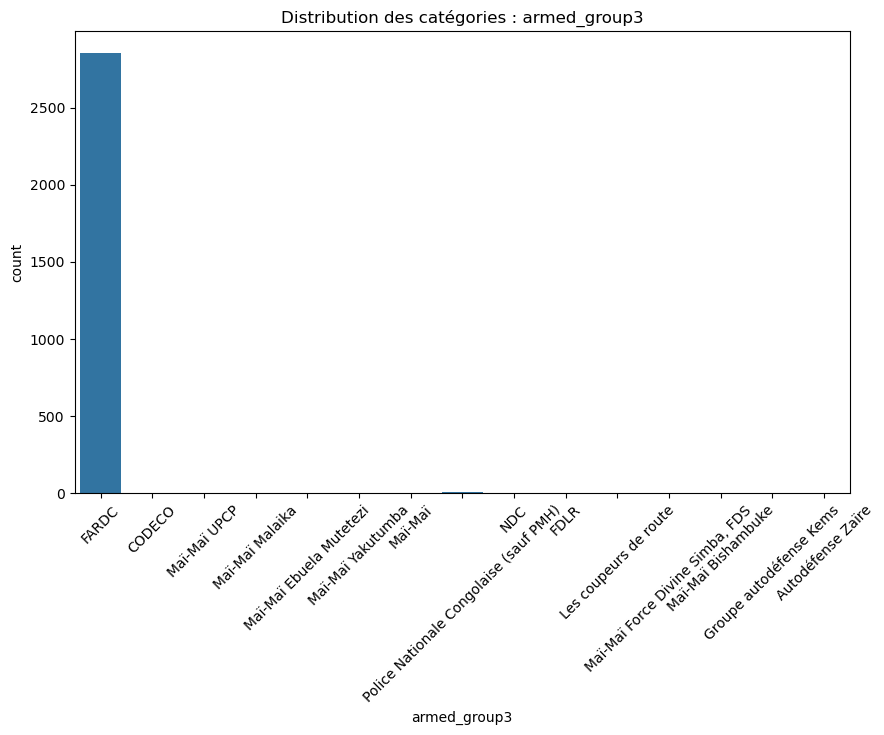

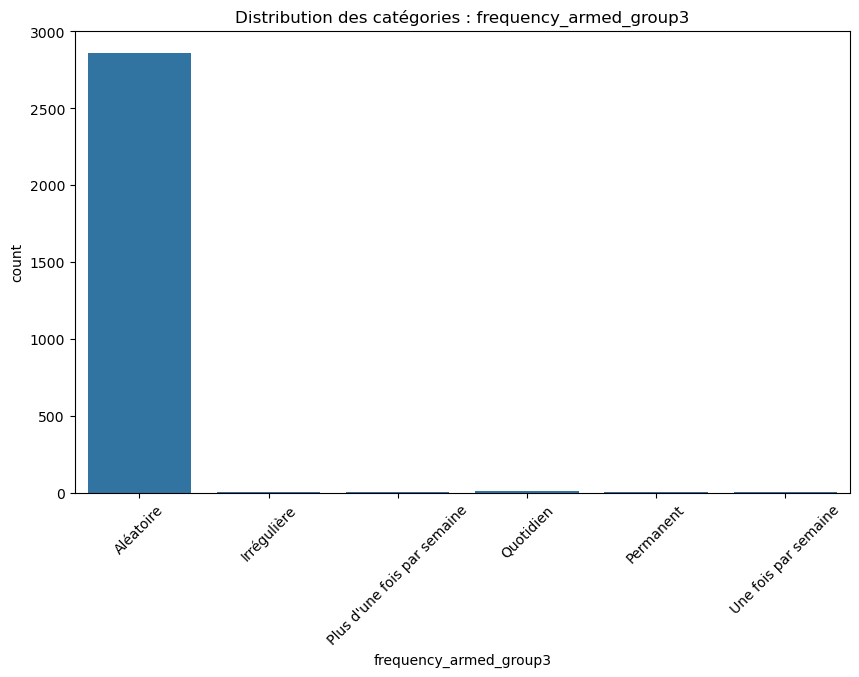

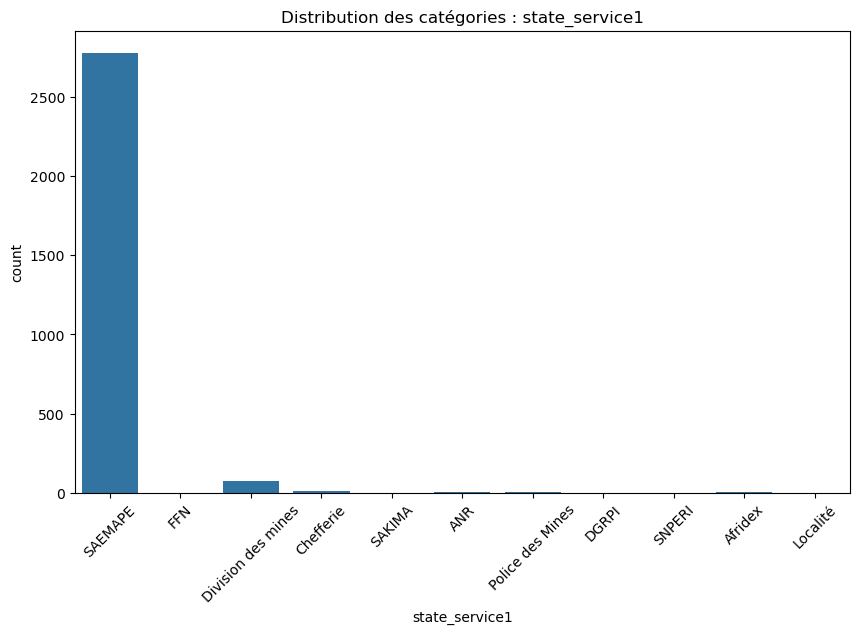

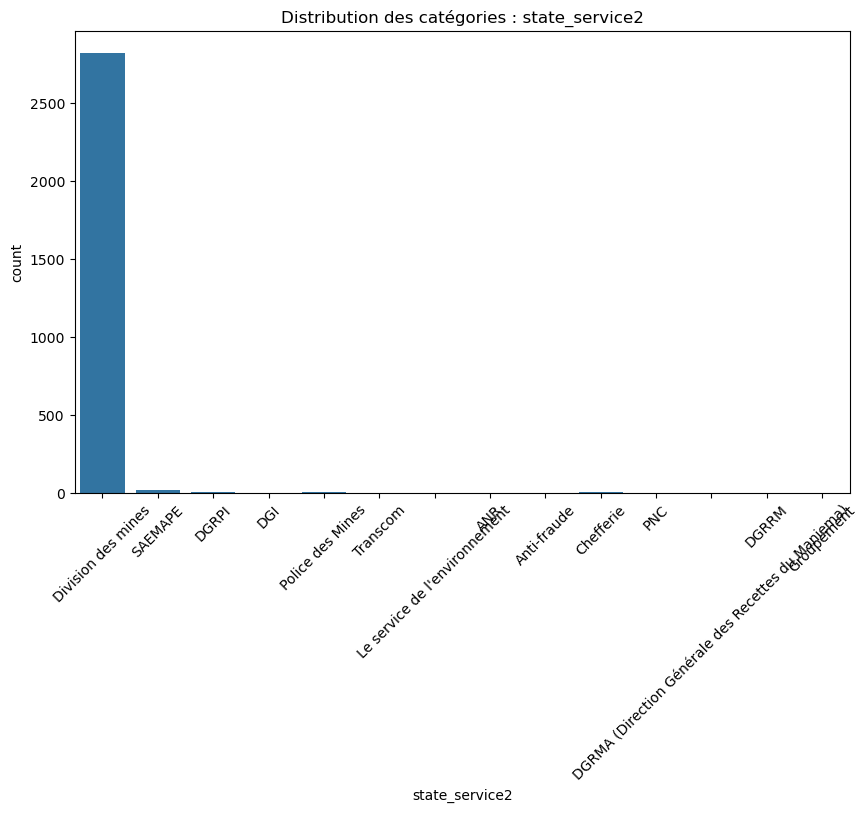

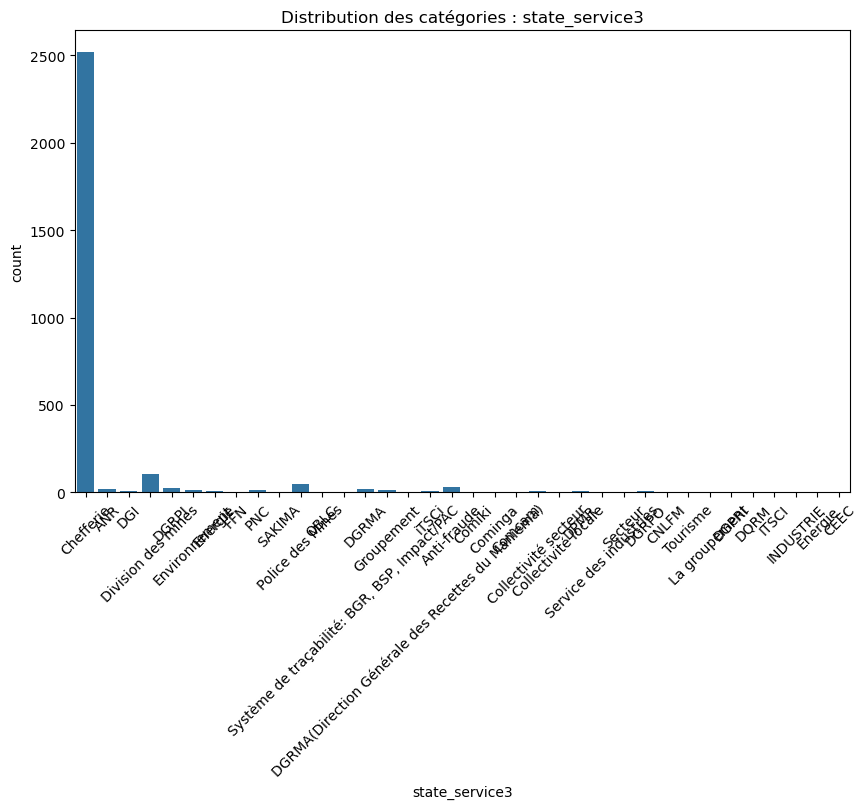

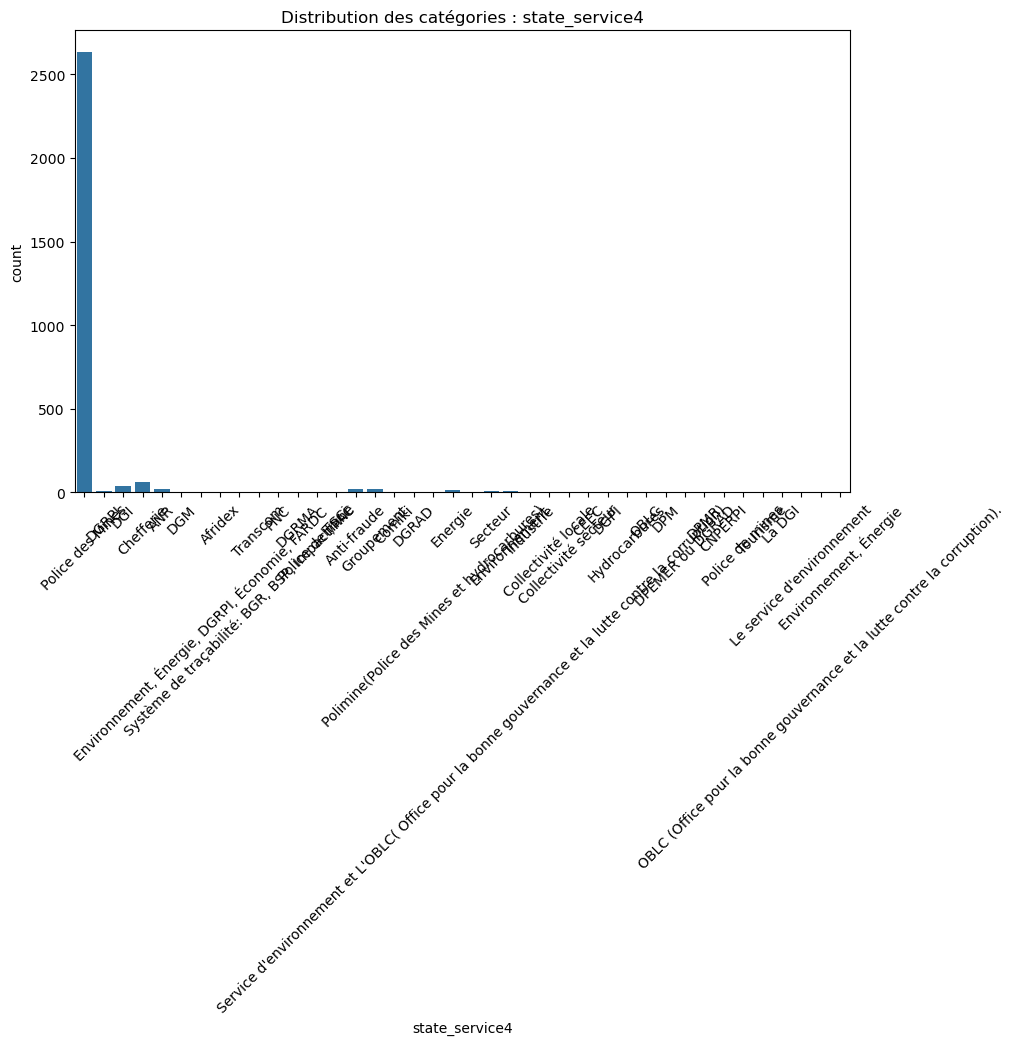

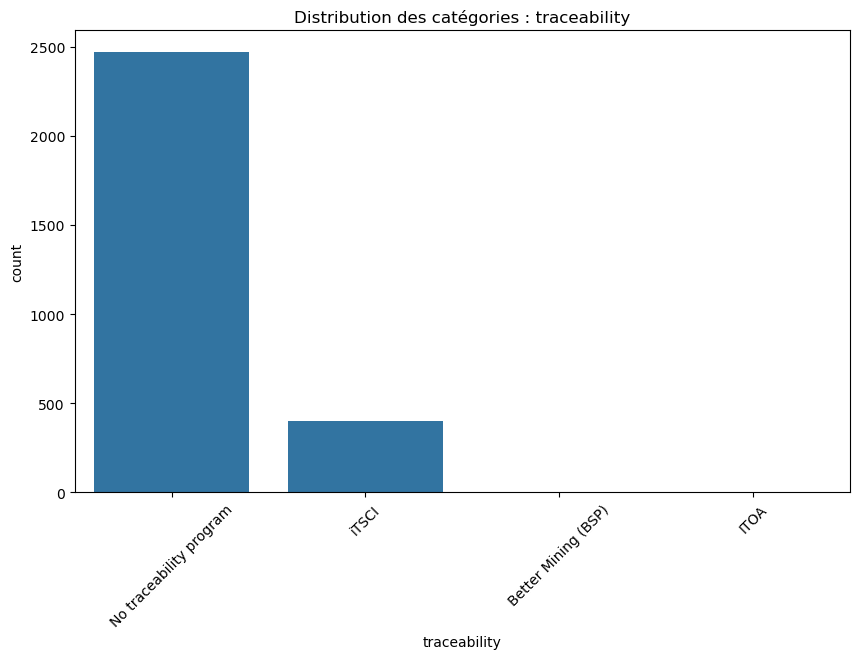

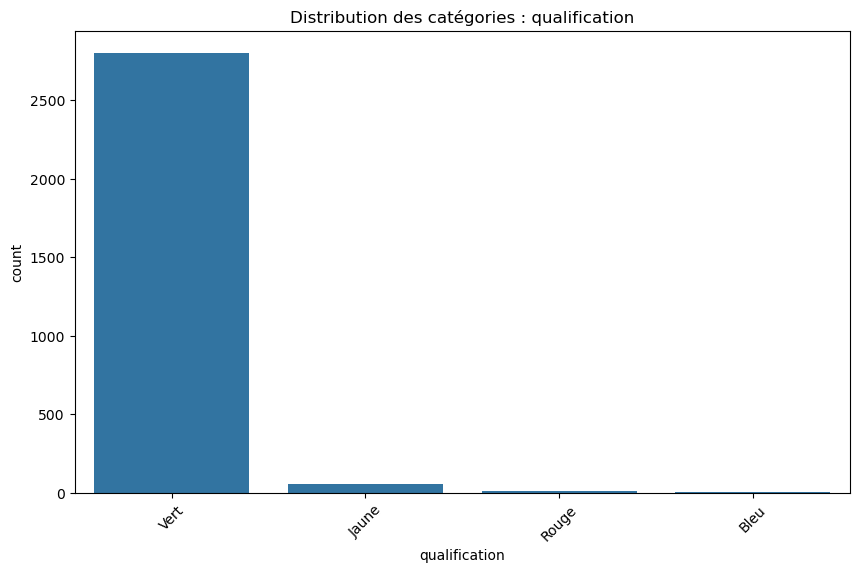

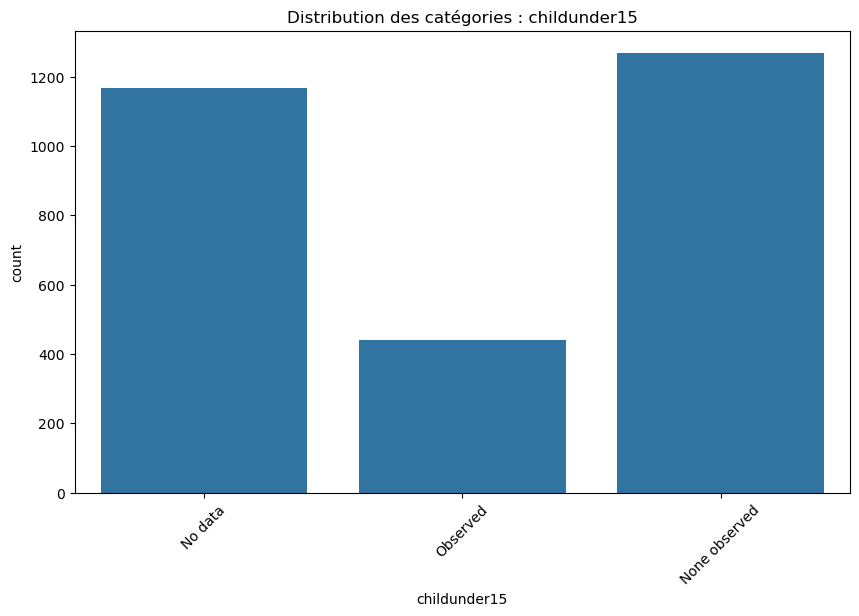

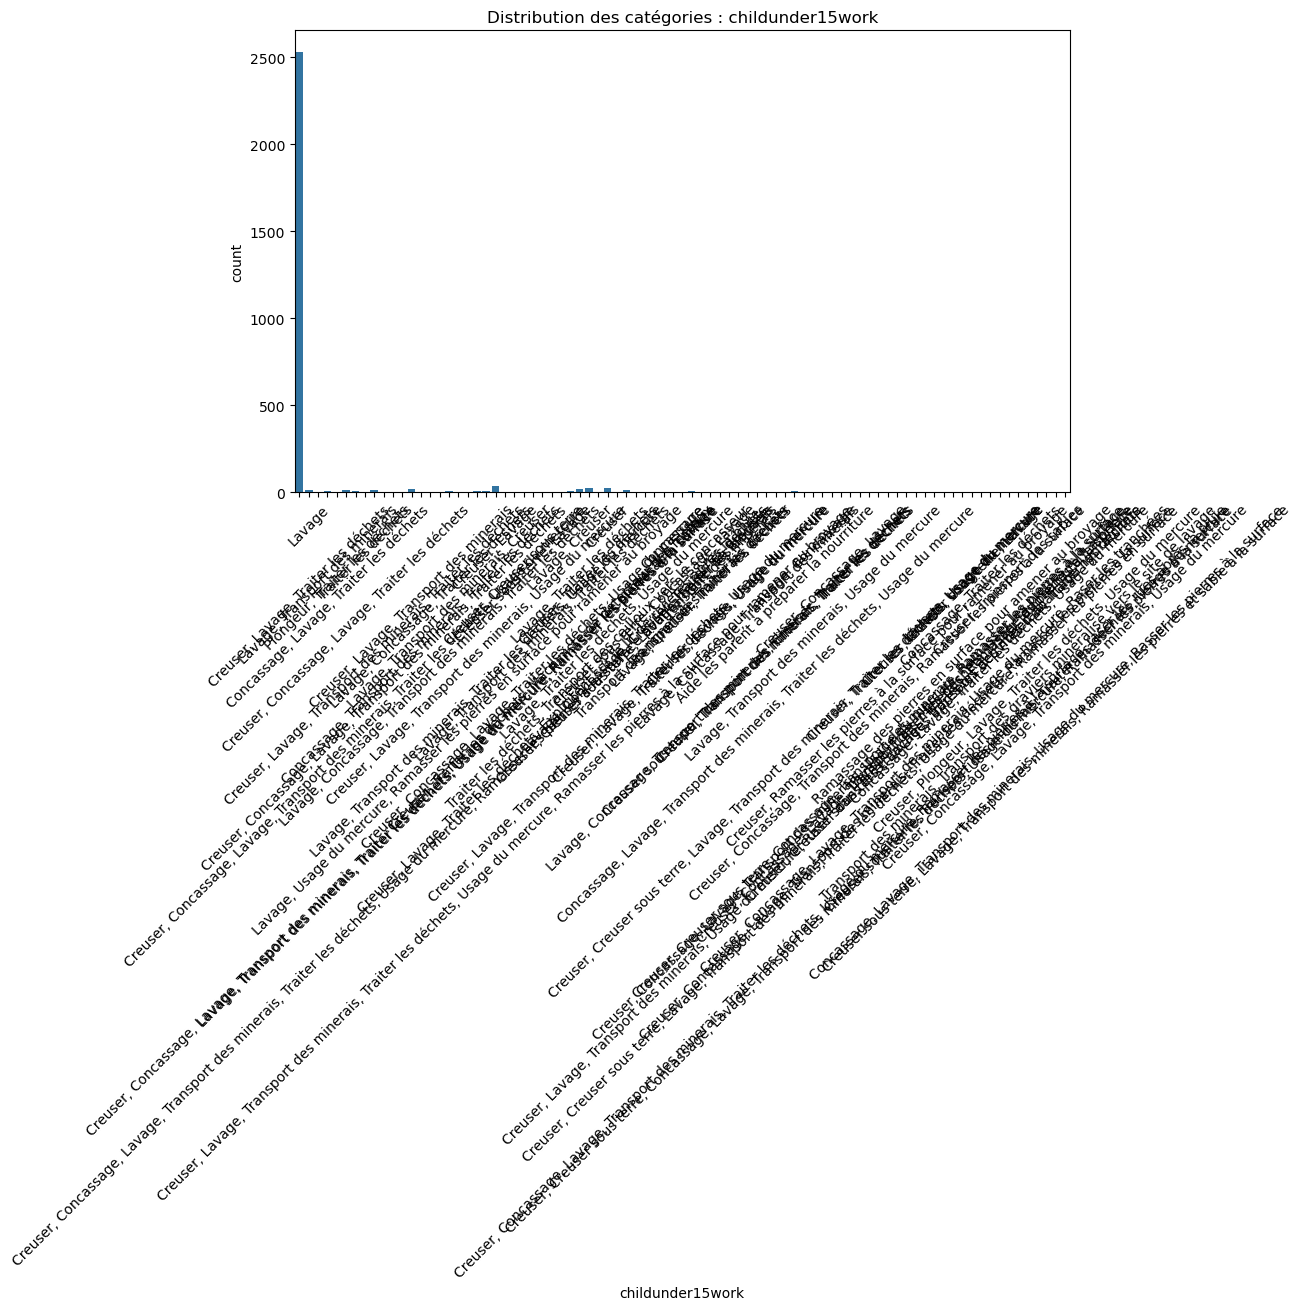

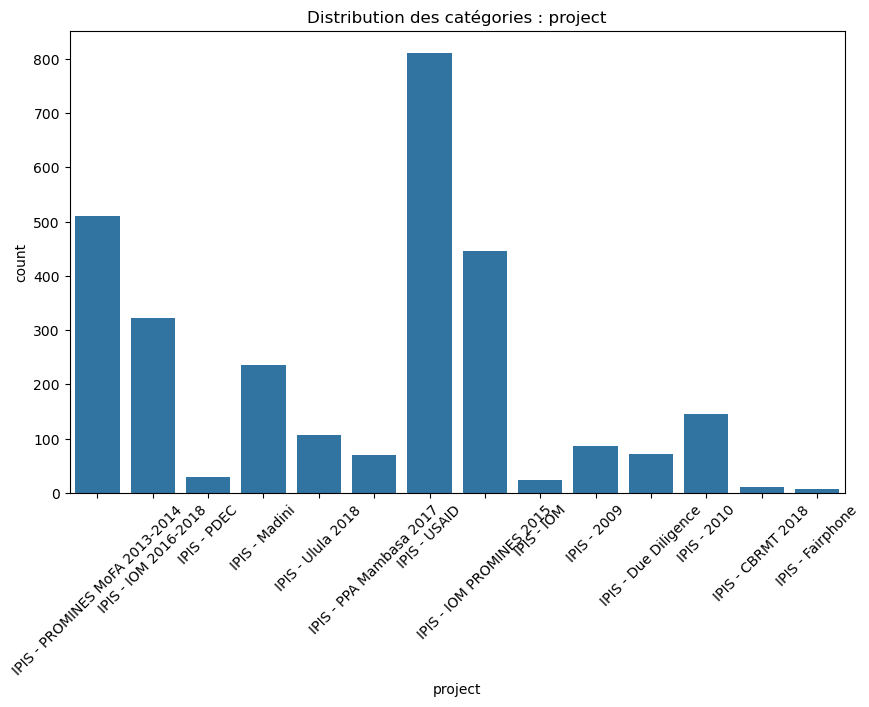

Rapport EDA sauvegardé dans 'eda_report_phase2.txt'.


In [29]:
# Importer les bibliothèques nécessaires
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Collecte des données à partir des sources identifiées
# Vous avez déjà chargé vos données dans la phase 1.
# Si vous avez de nouvelles données à ajouter, vous pouvez les charger ici.

# Exemple si vous avez d'autres fichiers CSV :
# new_data = pd.read_csv("path_to_new_data.csv")

# Vous pouvez ensuite concaténer les nouvelles données aux anciennes, si nécessaire :
# data = pd.concat([data, new_data], ignore_index=True)

# 2. Prétraitement des données : Gérer les valeurs manquantes
# Vérification des valeurs manquantes dans les nouvelles données
print("\nVérification des valeurs manquantes après la collecte de nouvelles données :")
print(data.isnull().sum())

# Imputation des valeurs manquantes avec la médiane (pour les colonnes numériques) ou une valeur par défaut (catégorielle)
from sklearn.impute import SimpleImputer

# Imputation des colonnes numériques avec la médiane
numeric_columns = data.select_dtypes(include=[np.number]).columns
imputer_numeric = SimpleImputer(strategy='median')
data[numeric_columns] = imputer_numeric.fit_transform(data[numeric_columns])

# Imputation des colonnes catégorielles avec la valeur la plus fréquente
categorical_columns = data.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])

print("\nDonnées après l'imputation des valeurs manquantes :")
print(data.isnull().sum())

# 3. Détection et gestion des valeurs aberrantes (Outliers)
# Utiliser le Z-score pour détecter les outliers dans les colonnes numériques
from scipy import stats

# Calcul des Z-scores pour chaque colonne numérique
z_scores = np.abs(stats.zscore(data[numeric_columns]))

# Seuil typique : Z-score > 3 est considéré comme un outlier
outliers = (z_scores > 3).sum(axis=0)
print("\nNombre de valeurs aberrantes par colonne numérique :")
print(outliers)

# Option : Suppression des lignes avec des outliers
# data_cleaned_no_outliers = data[(z_scores < 3).all(axis=1)]

# 4. Analyse exploratoire des données (EDA)
# Afficher la distribution de chaque colonne numérique
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution de la colonne : {column}')
    plt.show()

# Visualisation des corrélations entre les variables numériques
plt.figure(figsize=(12, 8))
corr_matrix = data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

# Boxplots pour détecter visuellement les valeurs aberrantes dans les colonnes numériques
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de la colonne : {column}')
    plt.show()

# 5. Documenter les étapes de prétraitement
# Vous pouvez simplement sauvegarder les données nettoyées et les informations clés dans un fichier CSV ou un document.
cleaned_data_file = "data_cleaned_phase2.csv"
data.to_csv(cleaned_data_file, index=False)
print(f"\nDonnées nettoyées sauvegardées dans le fichier '{cleaned_data_file}'.")

# Enregistrer un résumé des statistiques descriptives après nettoyage
summary_file = "summary_stats_phase2.txt"
with open(summary_file, "w") as f:
    f.write("Statistiques descriptives après nettoyage :\n")
    f.write(str(data.describe()))
print(f"Résumé des statistiques descriptives sauvegardé dans '{summary_file}'.")

# 6. Bonus : Visualisation de la distribution des catégories (si vous avez des colonnes catégorielles intéressantes)
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.title(f"Distribution des catégories : {column}")
    plt.xticks(rotation=45)
    plt.show()

# 7. Documenter les résultats de l'EDA et les sources de données
eda_report = """
Phase 2 : Prétraitement et EDA
Sources de données : 
- Fichier principal : 2024-07-12_filteredData_DRC_Opendata_IPIS.csv
- Autres sources (à compléter si vous avez ajouté des fichiers)

Étapes de prétraitement :
- Imputation des valeurs manquantes pour les colonnes numériques avec la médiane.
- Imputation des valeurs manquantes pour les colonnes catégorielles avec la valeur la plus fréquente.
- Détection des valeurs aberrantes avec le Z-score (seuil > 3).
- Suppression des valeurs aberrantes (optionnel).

Analyse exploratoire des données :
- Visualisation de la distribution des colonnes numériques avec des histogrammes et des densités.
- Matrice de corrélation des variables numériques.
- Boxplots pour visualiser les outliers.
- Analyse des distributions des colonnes catégorielles.

"""
with open("eda_report_phase2.txt", "w") as f:
    f.write(eda_report)
print("Rapport EDA sauvegardé dans 'eda_report_phase2.txt'.")


PHASE 3 DU PROJET


Caractéristiques principales sélectionnées :
  interference armed_group1                            armed_group2  \
0     Observed        FARDC  Police Nationale Congolaise (sauf PMH)   
1     Observed        FARDC  Police Nationale Congolaise (sauf PMH)   
2     Observed        FARDC  Police Nationale Congolaise (sauf PMH)   
3     Observed        FARDC  Police Nationale Congolaise (sauf PMH)   
4     Observed         FRPI  Police Nationale Congolaise (sauf PMH)   

  armed_group3  
0        FARDC  
1        FARDC  
2        FARDC  
3        FARDC  
4        FARDC  

Nouvelles fonctionnalités créées :
               armed_group_risk  worker_density  traceability_score
0  PermanenteAléatoireAléatoire        0.000374                   0
1  PermanenteAléatoireAléatoire        0.000287                   0
2  PermanenteAléatoireAléatoire        0.000324                   0
3  PermanenteAléatoireAléatoire        0.000337                   0
4  PermanenteAléatoireAléatoire        0.000673  

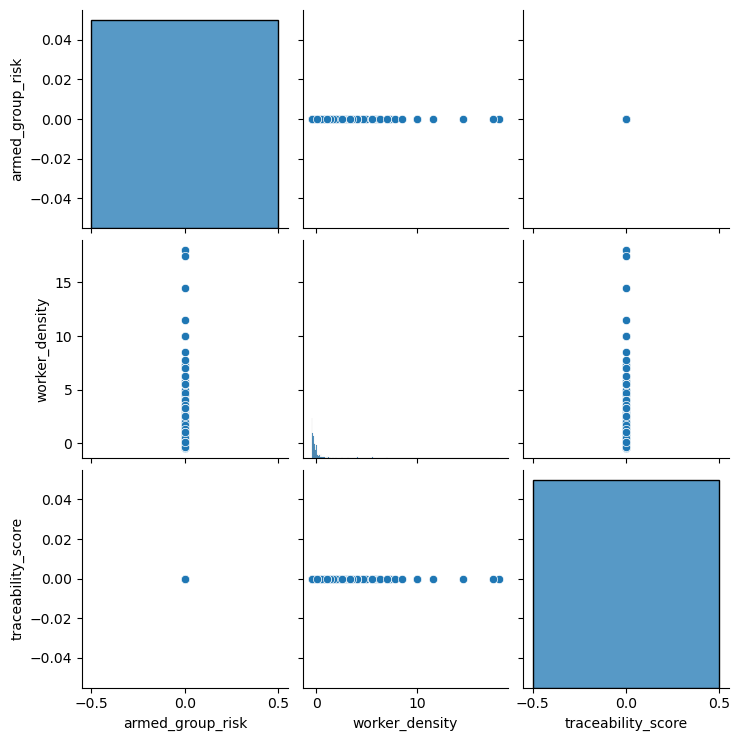

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Supposons que 'data' soit votre DataFrame

# 1. Identifier les principales caractéristiques liées au risque
risk_columns = ['interference', 'armed_group1', 'armed_group2', 'armed_group3']
selected_features = data[risk_columns]

print("\nCaractéristiques principales sélectionnées :")
print(selected_features.head())

# 2. Créer de nouvelles fonctionnalités basées sur les connaissances du domaine
# Exemple : Combiner les groupes armés pour un indicateur de risque de sécurité
data['armed_group_risk'] = data['frequency_armed_group1'] + data['frequency_armed_group2'] + data['frequency_armed_group3']

# Exemple : Créer une densité de travailleurs (basée sur le nombre de travailleurs)
data['worker_density'] = data['workers_numb'] / data['workers_numb'].sum()

# Vous pouvez également créer une variable pour la traçabilité
data['traceability_score'] = data['traceability'].apply(lambda x: 1 if x == 'yes' else 0)

print("\nNouvelles fonctionnalités créées :")
print(data[['armed_group_risk', 'worker_density', 'traceability_score']].head())

# 3. Filtrer uniquement les colonnes numériques pour l'imputation
columns_to_scale = ['armed_group_risk', 'worker_density', 'traceability_score']

# Assurez-vous que les colonnes à imputer sont bien numériques
numeric_data = data[columns_to_scale].apply(pd.to_numeric, errors='coerce')

# Vérifiez quelles colonnes sont entièrement manquantes
empty_columns = numeric_data.columns[numeric_data.isna().all()].tolist()

# Imputation uniquement sur les colonnes qui ne sont pas entièrement vides
non_empty_columns = [col for col in columns_to_scale if col not in empty_columns]
imputer = SimpleImputer(strategy='mean')

# Appliquez l'imputation aux colonnes non vides
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data[non_empty_columns]),
                                    columns=non_empty_columns)

# Remplacer les colonnes avec les données imputées dans les colonnes non vides
data[non_empty_columns] = numeric_data_imputed

# Pour les colonnes entièrement vides, vous pouvez décider de les remplir par une valeur par défaut (par ex. 0) ou les ignorer
data[empty_columns] = 0  # Exemple : on remplace les colonnes vides par 0

# 4. Normalisation et mise à l’échelle des fonctionnalités numériques
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print("\nCaractéristiques après normalisation :")
print(data[columns_to_scale].head())

# 5. Documenter le processus d’ingénierie des fonctionnalités
feature_engineering_report = """
Phase 3 : Ingénierie des fonctionnalités
Principales caractéristiques identifiées :
- 'interference' : Interférence dans les opérations ASM.
- 'armed_group1', 'armed_group2', 'armed_group3' : Présence de groupes armés.

Nouvelles fonctionnalités créées :
- 'armed_group_risk' : Somme des fréquences des groupes armés pour un indicateur de risque global.
- 'worker_density' : Densité des travailleurs par rapport à l'ensemble des sites.
- 'traceability_score' : Indicateur de traçabilité (1 pour oui, 0 pour non).

Normalisation effectuée :
- Les colonnes 'armed_group_risk', 'worker_density', 'traceability_score' ont été normalisées.

"""

# Sauvegarder le rapport d'ingénierie des fonctionnalités
with open("feature_engineering_report_phase3.txt", "w") as f:
    f.write(feature_engineering_report)
print("Rapport d'ingénierie des fonctionnalités sauvegardé dans 'feature_engineering_report_phase3.txt'.")

# Enregistrer les données avec les nouvelles fonctionnalités et les valeurs normalisées
output_file = "data_with_features_phase3.csv"
data.to_csv(output_file, index=False)
print(f"Données avec les nouvelles fonctionnalités enregistrées sous le nom '{output_file}'.")

# ajoutement des visualisations pour mieux comprendre les nouvelles fonctionnalités créées 
# ceci donne une vue d'ensemble des relations entre les variables après la normalisation.
sns.pairplot(data[columns_to_scale])
plt.show()


PHASE 4 DU PROJET

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Chargement des données (remplacez 'data.csv' par le chemin de votre fichier)
output_file = "data_with_features_phase3.csv"
data.to_csv(output_file, index=False)
# data = pd.read_csv() 
# Décommentez cette ligne pour charger vos données

# 2. Vérification des colonnes
print("Colonnes disponibles dans le dataset :")
print(data.columns)

# 3. Vérification de l'existence de 'visit_date'
if 'visit_date' in data.columns:
    # Convertir 'visit_date' en format datetime et extraire des caractéristiques
    data['visit_date'] = pd.to_datetime(data['visit_date'], errors='coerce')  # Conversion en datetime
    data['year'] = data['visit_date'].dt.year  # Extraire l'année
    data['month'] = data['visit_date'].dt.month  # Extraire le mois
    data['day'] = data['visit_date'].dt.day  # Extraire le jour
    data.drop(columns=['visit_date'], inplace=True)  # Supprimer la colonne d'origine
else:
    print("La colonne 'visit_date' n'existe pas dans le DataFrame.")

# 4. Définir X et y
X = data.drop(columns=['armed_group_risk', 'Unnamed: 0', 'pcode', 'name'], errors='ignore')  # Exclure les colonnes non pertinentes
y = data['armed_group_risk'] if 'armed_group_risk' in data.columns else None  # Colonne cible (variable à prédire)

# Vérification si y est valide
if y is None:
    raise ValueError("La colonne cible 'armed_group_risk' est manquante dans le DataFrame.")

# 5. Vérification de la distribution des classes
class_counts = y.value_counts()
print(f"Distribution des classes dans y:\n{class_counts}")

# 6. Vérifiez si nous avons au moins deux classes
if class_counts.min() < 2:
    raise ValueError("La colonne cible 'armed_group_risk' doit contenir au moins 2 classes.")

# 7. Séparer les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Modèle de Régression Logistique avec pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Mise à l'échelle des caractéristiques
    ('logreg', LogisticRegression())  # Régression Logistique
])

# 9. Entraîner le modèle
logreg_pipeline.fit(X_train, y_train)

# 10. Prédictions
y_pred_logreg = logreg_pipeline.predict(X_test)

# 11. Afficher les résultats
print(f"Prédictions de la régression logistique : {y_pred_logreg}")


Colonnes disponibles dans le dataset :
Index(['Unnamed: 0', 'pcode', 'name', 'province', 'workers_numb', 'access_dry',
       'access_wet', 'mineral1', 'mineral2', 'mineral3', 'mercury',
       'interference', 'armed_group1', 'frequency_armed_group1',
       'armed_group2', 'frequency_armed_group2', 'armed_group3',
       'frequency_armed_group3', 'state_service1', 'state_service2',
       'state_service3', 'state_service4', 'traceability', 'qualification',
       'childunder15', 'childunder15work', 'project', 'armed_group_risk',
       'worker_density', 'traceability_score', 'year', 'month', 'day'],
      dtype='object')
La colonne 'visit_date' n'existe pas dans le DataFrame.
Distribution des classes dans y:
armed_group_risk
0.0    2876
Name: count, dtype: int64


ValueError: could not convert string to float: 'Maniema'

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Simulation des données (à remplacer par les vraies données)
# X = data[['mineral1', 'workers_numb', 'productivity_per_worker', 'province_population']]
# y = data['province']  # Remplacer par la variable cible

# Exemple de simulation des données pour éviter les erreurs pendant les tests
X = np.random.rand(100, 4)  # Remplace cette ligne par les vraies données
y = np.random.randint(0, 3, 100)  # 3 classes pour simuler un problème multiclass

# Division des données : 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remplacement des valeurs infinies par NaN dans X_train
X_train[np.isinf(X_train)] = np.nan

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression avec gestion des classes déséquilibrées
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_logreg = logreg.predict(X_test)

# Évaluation des métriques avec `zero_division`
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_logreg, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_logreg, average='weighted', zero_division=1)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr')

# Affichage des résultats
print(f"Régression Logistique - Exactitude: {accuracy}, Précision: {precision}, Rappel: {recall}, F1: {f1}, ROC-AUC: {roc_auc}")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred_logreg)
print("Matrice de confusion pour la régression logistique :\n", cm)

# Decision Tree Classifier avec gestion des classes déséquilibrées
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_tree = tree.predict(X_test)

# Évaluation des métriques pour l'arbre de décision
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted', zero_division=1)
recall_tree = recall_score(y_test, y_pred_tree, average='weighted', zero_division=1)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted', zero_division=1)
roc_auc_tree = roc_auc_score(y_test, tree.predict_proba(X_test), multi_class='ovr')

# Affichage des résultats
print(f"Arbre de Décision - Exactitude: {accuracy_tree}, Précision: {precision_tree}, Rappel: {recall_tree}, F1: {f1_tree}, ROC-AUC: {roc_auc_tree}")

# Afficher la matrice de confusion pour l'arbre de décision
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de confusion pour l'arbre de décision :\n", cm_tree)

# Vérifier la distribution des classes dans y_test et y_pred_logreg
print("Distribution des classes dans y_test :", np.bincount(y_test))
print("Distribution des classes dans y_pred_logreg :", np.bincount(y_pred_logreg))
# Création d'un dictionnaire pour stocker les résultats de chaque modèle
model_results = {}

# Stocker les résultats de la régression logistique
model_results['Logistic Regression'] = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc
}

# Stocker les résultats de l'arbre de décision
model_results['Decision Tree'] = {
    'accuracy': accuracy_tree,
    'precision': precision_tree,
    'recall': recall_tree,
    'f1': f1_tree,
    'roc_auc': roc_auc_tree
}

# Comparaison des résultats
print("Comparaison des modèles :")
for model, metrics in model_results.items():
    print(f"\nModèle : {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name.capitalize()} : {value:.4f}")

# Comparer les modèles selon une métrique spécifique, par exemple, 'f1'
best_model = max(model_results, key=lambda model: model_results[model]['f1'])

print(f"\nLe modèle avec le meilleur score F1 est : {best_model} avec un score de {model_results[best_model]['f1']:.4f}")


Régression Logistique - Exactitude: 0.45, Précision: 0.45999999999999996, Rappel: 0.45, F1: 0.4426923076923077, ROC-AUC: 0.5347985347985348
Matrice de confusion pour la régression logistique :
 [[2 3 2]
 [2 4 0]
 [2 2 3]]
Arbre de Décision - Exactitude: 0.2, Précision: 0.1518181818181818, Rappel: 0.2, F1: 0.1642156862745098, ROC-AUC: 0.4093406593406594
Matrice de confusion pour l'arbre de décision :
 [[1 3 3]
 [2 3 1]
 [2 5 0]]
Distribution des classes dans y_test : [7 6 7]
Distribution des classes dans y_pred_logreg : [6 9 5]
Comparaison des modèles :

Modèle : Logistic Regression
Accuracy : 0.4500
Precision : 0.4600
Recall : 0.4500
F1 : 0.4427
Roc_auc : 0.5348

Modèle : Decision Tree
Accuracy : 0.2000
Precision : 0.1518
Recall : 0.2000
F1 : 0.1642
Roc_auc : 0.4093

Le modèle avec le meilleur score F1 est : Logistic Regression avec un score de 0.4427
